In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

### Importing an extension of the "missing" functions from Pandas

In [2]:
%run utils/u.0.0-pandas_missing_extension.ipynb

### Importing functions of the DataFrame Dictionary

In [36]:
%run utils/u.0.1-df_functions.ipynb

### Getting the interim data

In [4]:
arg_di_df = pd.read_csv("../data/interim/WDICSV_INTERIM.csv")
print(arg_di_df.shape)
arg_di_df.info()

(64, 97)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      64 non-null     int64  
 1   EG.ELC.ACCS.ZS            33 non-null     float64
 2   FX.OWN.TOTL.ZS            4 non-null      float64
 3   FX.OWN.TOTL.OL.ZS         4 non-null      float64
 4   FX.OWN.TOTL.40.ZS         4 non-null      float64
 5   FX.OWN.TOTL.PL.ZS         4 non-null      float64
 6   FX.OWN.TOTL.60.ZS         4 non-null      float64
 7   FX.OWN.TOTL.SO.ZS         4 non-null      float64
 8   FX.OWN.TOTL.YG.ZS         4 non-null      float64
 9   per_si_allsi.adq_pop_tot  12 non-null     float64
 10  per_allsp.adq_pop_tot     12 non-null     float64
 11  per_sa_allsa.adq_pop_tot  12 non-null     float64
 12  per_lm_alllm.adq_pop_tot  10 non-null     float64
 13  SE.PRM.TENR               26 non-null     float64
 14  SL.

### Setting initial plots styles

In [5]:
sns.set_style(
    style="whitegrid",
    rc={
        "figure.figsize": (10,10)
    }
)

### First missing variables summaries

In [6]:
arg_di_df.missing.missing_variable_summary().sort_values("pct_missing", ascending=False)

,variable,n_missing,n_cases,pct_missing
38,SE.TER.CUAT.MS.ZS,64,64,100.0
14,SL.TLF.0714.SW.TM,64,64,100.0
39,SE.TER.CUAT.DO.ZS,64,64,100.0
34,SE.SEC.CUAT.PO.ZS,64,64,100.0
32,SE.TER.CUAT.BA.ZS,64,64,100.0
...,...,...,...,...
70,SP.POP.1564.TO.ZS,0,64,0.0
69,SP.POP.0014.TO.ZS,0,64,0.0
46,NY.GDP.MKTP.KD,0,64,0.0
45,IT.MLT.MAIN,0,64,0.0


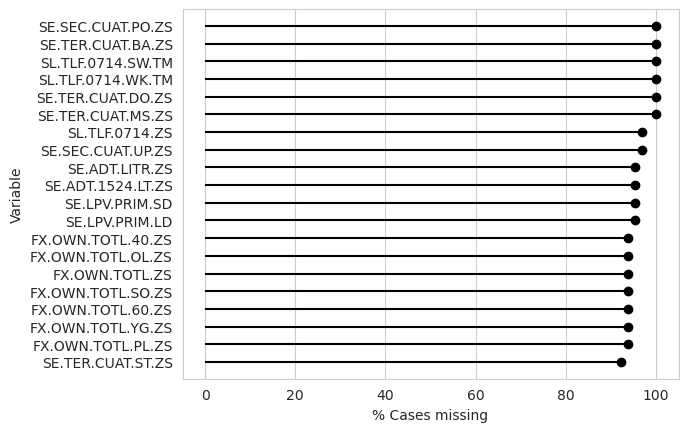

In [7]:
arg_di_df.missing.missing_variable_plot(20)

### Adding one column for years of military dictatorship

In [8]:
years_of_military_dictatorship = [
    (1930,1932),
    (1943,1946),
    (1955,1958),
    (1962,1963),
    (1966,1973),
    (1976,1983)
]

arg_di_df["year.of.dictatorship"] = arg_di_df["Year"].apply(lambda year: any(start <= year <= end for start, end in years_of_military_dictatorship))

In [9]:
dictionary = pd.read_csv("../data/utils/DF_DICTIONARY.csv")
if dictionary.loc[dictionary["Indicator Code"] == "year.of.dictatorship"].empty:
    dictionary = pd.concat(
        [
            dictionary,
            pd.DataFrame({
                "Indicator Name": ["It was a year of military dictatorship"],
                "Indicator Code": ["year.of.dictatorship"],
                "Indicator Code Snake Case": ["year_of_dictatorship"]
            })
        ]
    )
    dictionary.to_csv("../data/utils/DF_DICTIONARY.csv", index=False)

In [10]:
def plot_count_of_years_of_military_dictatorship(df):
    indicator_name = dictionary.loc[dictionary["Indicator Code"] == "year.of.dictatorship",["Indicator Name"]].iloc[0,0]
    years_of_dictatorship = pd.DataFrame(df.rename(columns={"year.of.dictatorship": indicator_name}).value_counts(indicator_name,ascending=True))
    years_of_dictatorship = years_of_dictatorship.rename(columns={"count": "Count"}).T
    years_of_dictatorship.plot(kind="barh",stacked=True, color=["green","grey"])

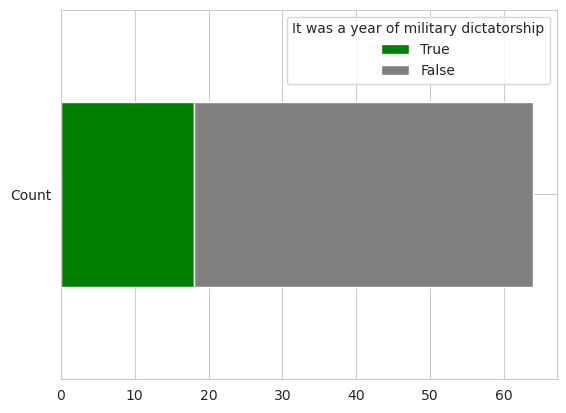

In [11]:
plot_count_of_years_of_military_dictatorship(arg_di_df)

### Exploring missing data of years of military dictatorship

In [12]:
arg_dictorship_years_df = arg_di_df[arg_di_df['year.of.dictatorship']]
arg_dictorship_years_df

,Year,EG.ELC.ACCS.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.OL.ZS,FX.OWN.TOTL.40.ZS,FX.OWN.TOTL.PL.ZS,FX.OWN.TOTL.60.ZS,FX.OWN.TOTL.SO.ZS,FX.OWN.TOTL.YG.ZS,per_si_allsi.adq_pop_tot,...,SE.TER.ENRR,SE.SEC.DURS,SL.EMP.SELF.ZS,SL.UEM.NEET.ME.ZS,SL.UEM.ADVN.ZS,SL.UEM.BASC.ZS,SL.UEM.INTM.ZS,SL.UEM.TOTL.ZS,SP.URB.TOTL.IN.ZS,year.of.dictatorship
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.767,True
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.309,True
6,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.888,True
7,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.398,True
8,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.901,True
9,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.394,True
10,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.377590,5.0,NaN,NaN,NaN,NaN,NaN,NaN,78.880,True
11,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.440980,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.321,True
12,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.620810,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.743,True
13,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.751631,5.0,NaN,NaN,NaN,NaN,NaN,NaN,80.158,True


### Filtering rows and columns with a lot of missing values

Comparing the DataFrame resulting of changing the order of the filters (rows and columns)

In [13]:
print(filter_by_cols_first(arg_di_df, 0.7).shape) # I obtain diffrent shapes when I change the percentage of missing values
print(filter_by_rows_first(arg_di_df, 0.7).shape)

(54, 25)
(8, 71)


I'll work with the first option due to it has more rows and less columns

In [14]:
arg_di_df_best_cases = filter_by_cols_first(arg_di_df, 0.7)
arg_di_df_best_cases

,Year,IT.MLT.MAIN,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SP.DYN.LE00.IN,IT.CEL.SETS,SH.DTH.IMRT,SH.DTH.MORT,...,SM.POP.REFG,SM.POP.REFG.OR,SP.RUR.TOTL.ZS,SE.PRE.ENRR,SE.PRM.ENRR,SE.SEC.ENRR,SE.TER.ENRR,SE.SEC.DURS,SP.URB.TOTL.IN.ZS,year.of.dictatorship
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,35000.0,NaN,21.120,23.444870,105.769478,44.709621,13.377590,5.0,78.880,True
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,34000.0,NaN,20.679,24.937660,106.752098,45.642109,15.440980,5.0,79.321,True
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,33000.0,NaN,20.257,26.519970,106.286819,47.472710,16.620810,5.0,79.743,True
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,37000.0,NaN,19.842,29.065580,105.710747,49.939709,19.751631,5.0,80.158,True
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,47000.0,NaN,19.433,31.402250,106.127319,52.762390,22.883011,5.0,80.567,False
15,1975,1651000.0,2.570980e+11,-0.028412,9935.938635,-1.673528,67.081,0.0,33434.0,39640.0,...,46000.0,NaN,19.031,35.701939,105.472260,54.387550,27.077160,5.0,80.969,False
16,1976,1678000.0,2.519091e+11,-2.018252,9581.841403,-3.563803,67.228,0.0,32686.0,38536.0,...,41010.0,NaN,18.634,37.910751,105.146507,55.880482,27.011740,5.0,81.366,True
17,1977,1692000.0,2.693768e+11,6.934148,10083.815183,5.238803,67.861,0.0,31346.0,36750.0,...,35000.0,NaN,18.245,39.397282,105.946831,55.626678,23.964741,5.0,81.755,True
18,1978,1728000.0,2.572384e+11,-4.506125,9476.063436,-6.027002,68.197,0.0,29499.0,34382.0,...,26390.0,NaN,17.861,NaN,105.351021,55.343731,21.250999,5.0,82.139,True
19,1979,1797000.0,2.835352e+11,10.222763,10278.924624,8.472518,68.491,0.0,27357.0,31734.0,...,27050.0,NaN,17.484,39.189339,105.662491,54.966290,22.120470,5.0,82.516,True


#### Working with best rows

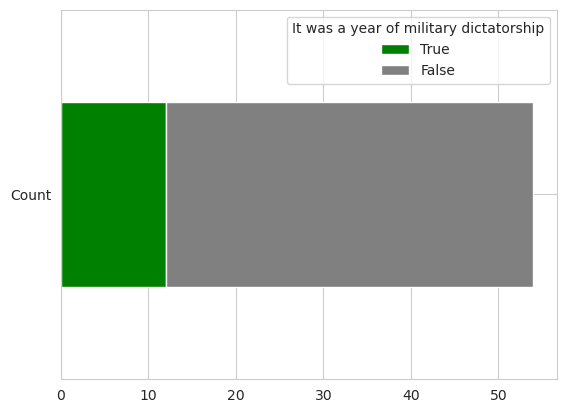

In [15]:
plot_count_of_years_of_military_dictatorship(filter_by_cols_first(arg_di_df, 0.5))

### Exploring missing variables

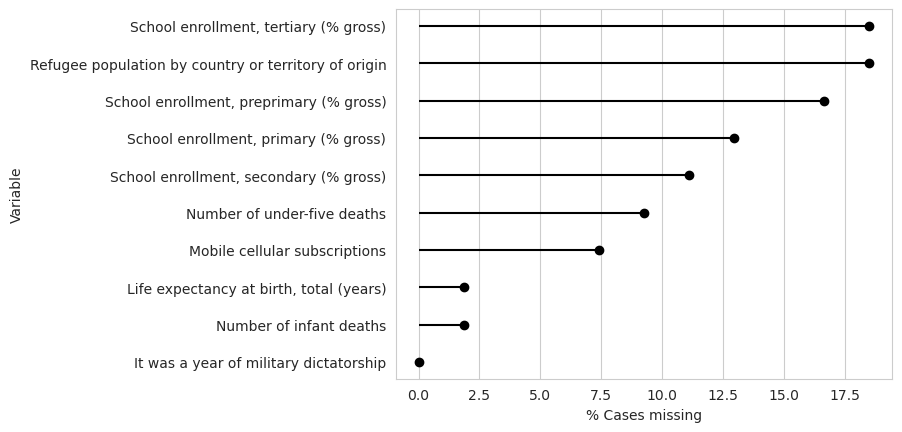

In [16]:
arg_di_df_best_cases.rename(columns=dictionary.set_index("Indicator Code")["Indicator Name"].to_dict(),inplace=False).missing.missing_variable_plot(10)

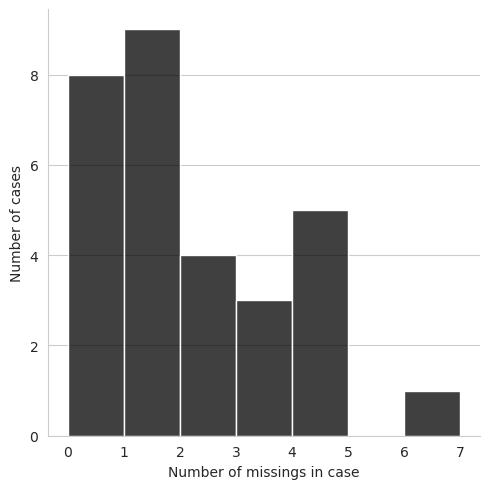

In [17]:
arg_di_df_best_cases.missing.missing_case_plot(30)

#### Getting columns with missing values

In [18]:
columns_with_missing_values = arg_di_df_best_cases.isna().sum().sort_values(ascending=False)
columns_with_missing_values = columns_with_missing_values[columns_with_missing_values > 0].index.to_list()
columns_with_missing_values

# Other ways to get the columns with missing values
# columns_with_missing_values = arg_di_df_best_cases.columns[arg_di_df_best_cases.isnull().any()].to_list()
# columns_with_missing_values = columns_with_pct_missing(arg_di_df_best_cases, 0.1, True)

['SE.TER.ENRR',
 'SM.POP.REFG.OR',
 'SE.PRE.ENRR',
 'SE.PRM.ENRR',
 'SE.SEC.ENRR',
 'SH.DTH.MORT',
 'IT.CEL.SETS',
 'SP.DYN.LE00.IN',
 'SH.DTH.IMRT']

In [ ]:
[get_indicator_name(item) for item in columns_with_missing_values]

['School enrollment, tertiary (% gross)',
 'Refugee population by country or territory of origin',
 'School enrollment, preprimary (% gross)',
 'School enrollment, primary (% gross)',
 'School enrollment, secondary (% gross)',
 'Number of under-five deaths',
 'Mobile cellular subscriptions',
 'Life expectancy at birth, total (years)',
 'Number of infant deaths']

##### Missing variable runs

This method don't show any pattern

In [20]:
all_missing_variable_run = pd.DataFrame()

for i in columns_with_missing_values:

    missing_variable_run = (
        arg_di_df_best_cases
            .missing
            .missing_variable_run(
                variable=i
            )
    )
    all_runs = missing_variable_run.apply(lambda row: row['run_length'] * -1 if row['is_na'] == "missing" else row['run_length'], axis=1).to_list()
    
    all_missing_variable_run = pd.concat(
        [
            all_missing_variable_run,
            pd.DataFrame({
                'variable': [i],
                'all_runs': [all_runs]
            })
        ],
        ignore_index=True
    )

all_missing_variable_run
    

,variable,all_runs
0,SE.TER.ENRR,"[18, -3, 1, -2, 1, -3, 24, -2]"
1,SM.POP.REFG.OR,"[-10, 44]"
2,SE.PRE.ENRR,"[8, -1, 10, -2, 1, -2, 1, -1, 25, -3]"
3,SE.PRM.ENRR,"[13, -1, 5, -1, 2, -2, 1, -1, 26, -2]"
4,SE.SEC.ENRR,"[19, -1, 2, -2, 1, -1, 26, -2]"
5,SH.DTH.MORT,"[-4, 49, -1]"
6,IT.CEL.SETS,"[1, -4, 49]"
7,SP.DYN.LE00.IN,"[53, -1]"
8,SH.DTH.IMRT,"[53, -1]"


To see more clearly, I plot the missing values

{'SE.TER.ENRR': 'School enrollment, tertiary (% gross)', 'SM.POP.REFG.OR': 'Refugee population by country or territory of origin', 'SE.PRE.ENRR': 'School enrollment, preprimary (% gross)', 'SE.PRM.ENRR': 'School enrollment, primary (% gross)', 'SE.SEC.ENRR': 'School enrollment, secondary (% gross)', 'SH.DTH.MORT': 'Number of under-five deaths', 'IT.CEL.SETS': 'Mobile cellular subscriptions', 'SP.DYN.LE00.IN': 'Life expectancy at birth, total (years)', 'SH.DTH.IMRT': 'Number of infant deaths'}


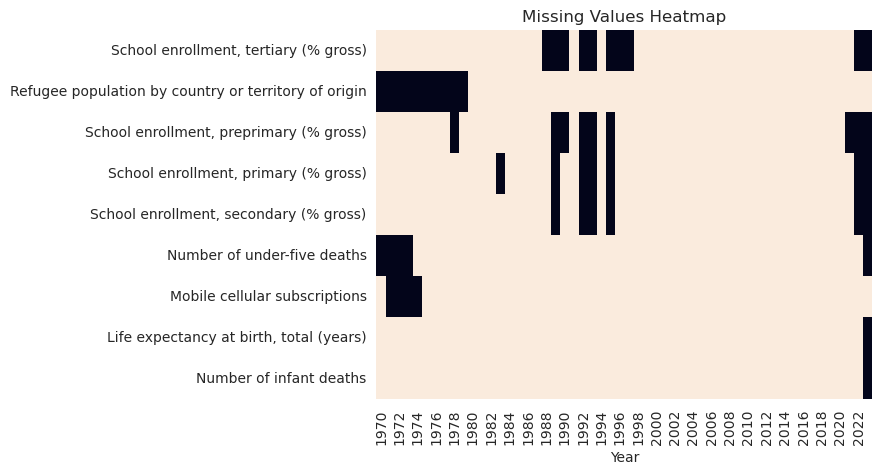

In [21]:
columns_with_names = [{item: get_indicator_name(item) for item in columns_with_missing_values}][0]
print(columns_with_names)
data = arg_di_df_best_cases[columns_with_missing_values + ['Year']].rename(columns=columns_with_names).missing.sort_variables_by_missingness().sort_values(by="Year").set_index('Year')
sns.heatmap(~data.isnull().T,cbar=False,xticklabels="auto")
plt.title("Missing Values Heatmap")
plt.show()

#### Correlation between missing variables

<Axes: >

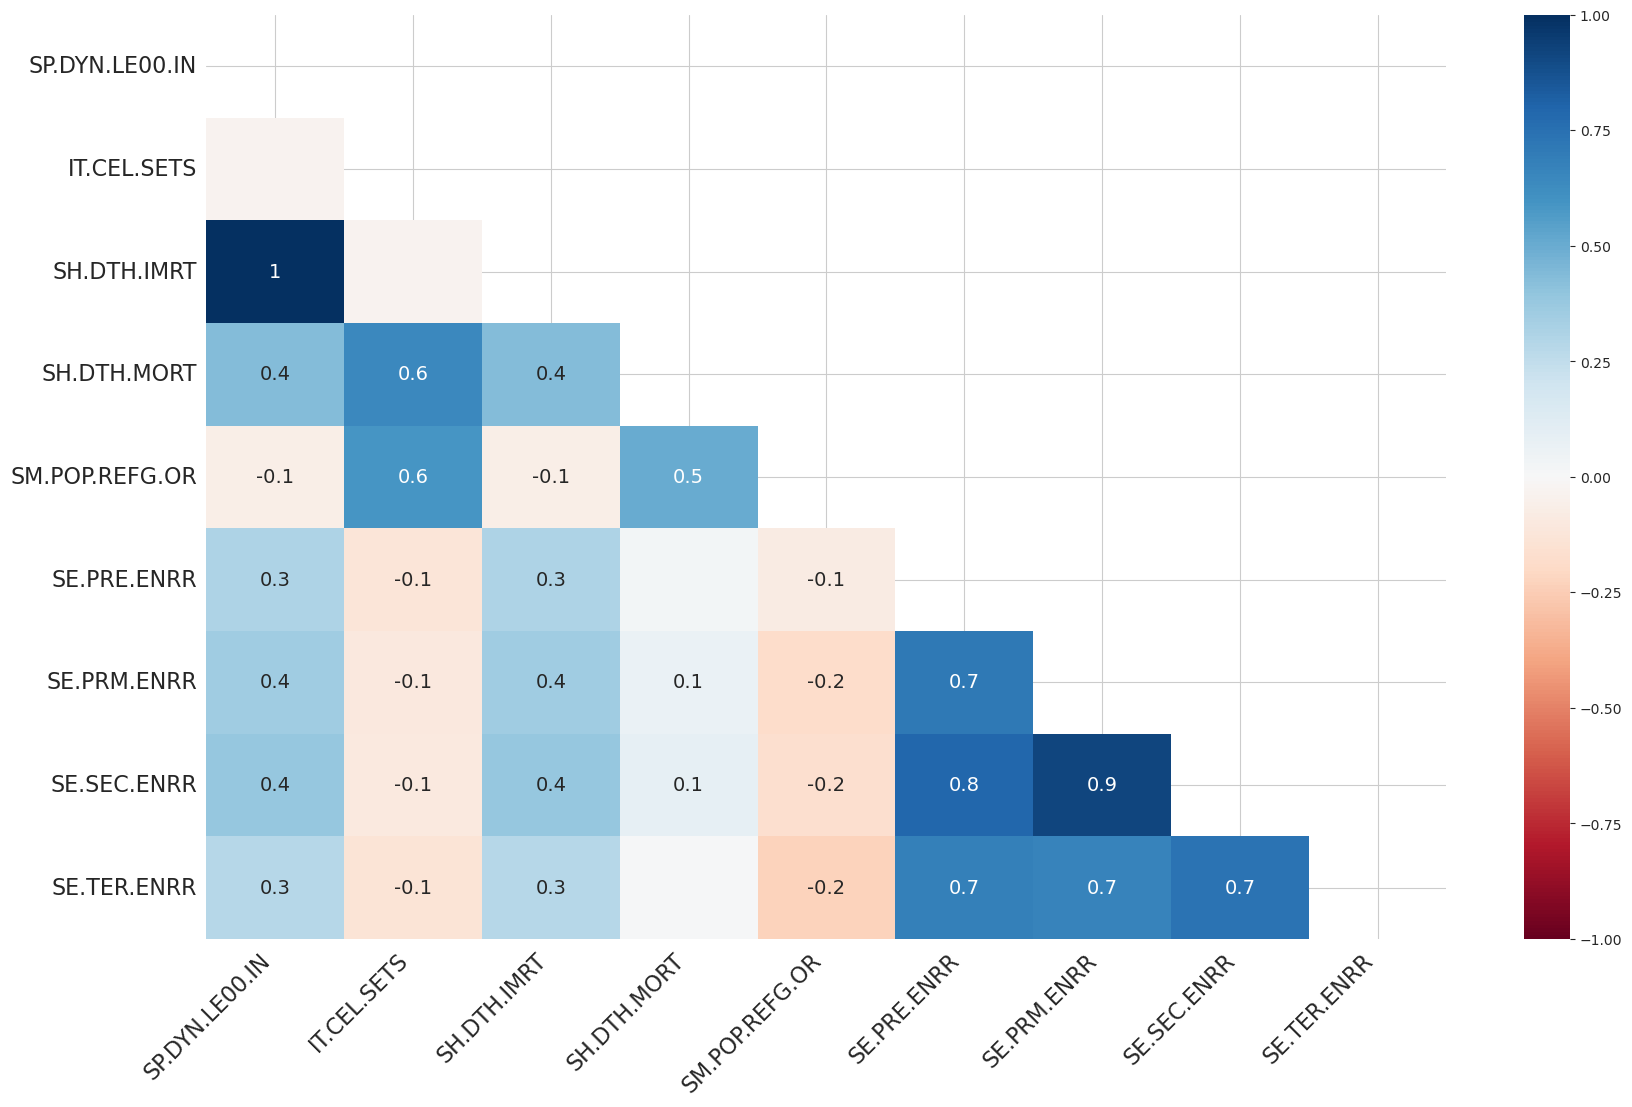

In [22]:
missingno.heatmap(df=arg_di_df_best_cases)

Missing variables grouped by hierachical clusters with high correlation. Correlation is higher when the branchs are closer. 

<Axes: >

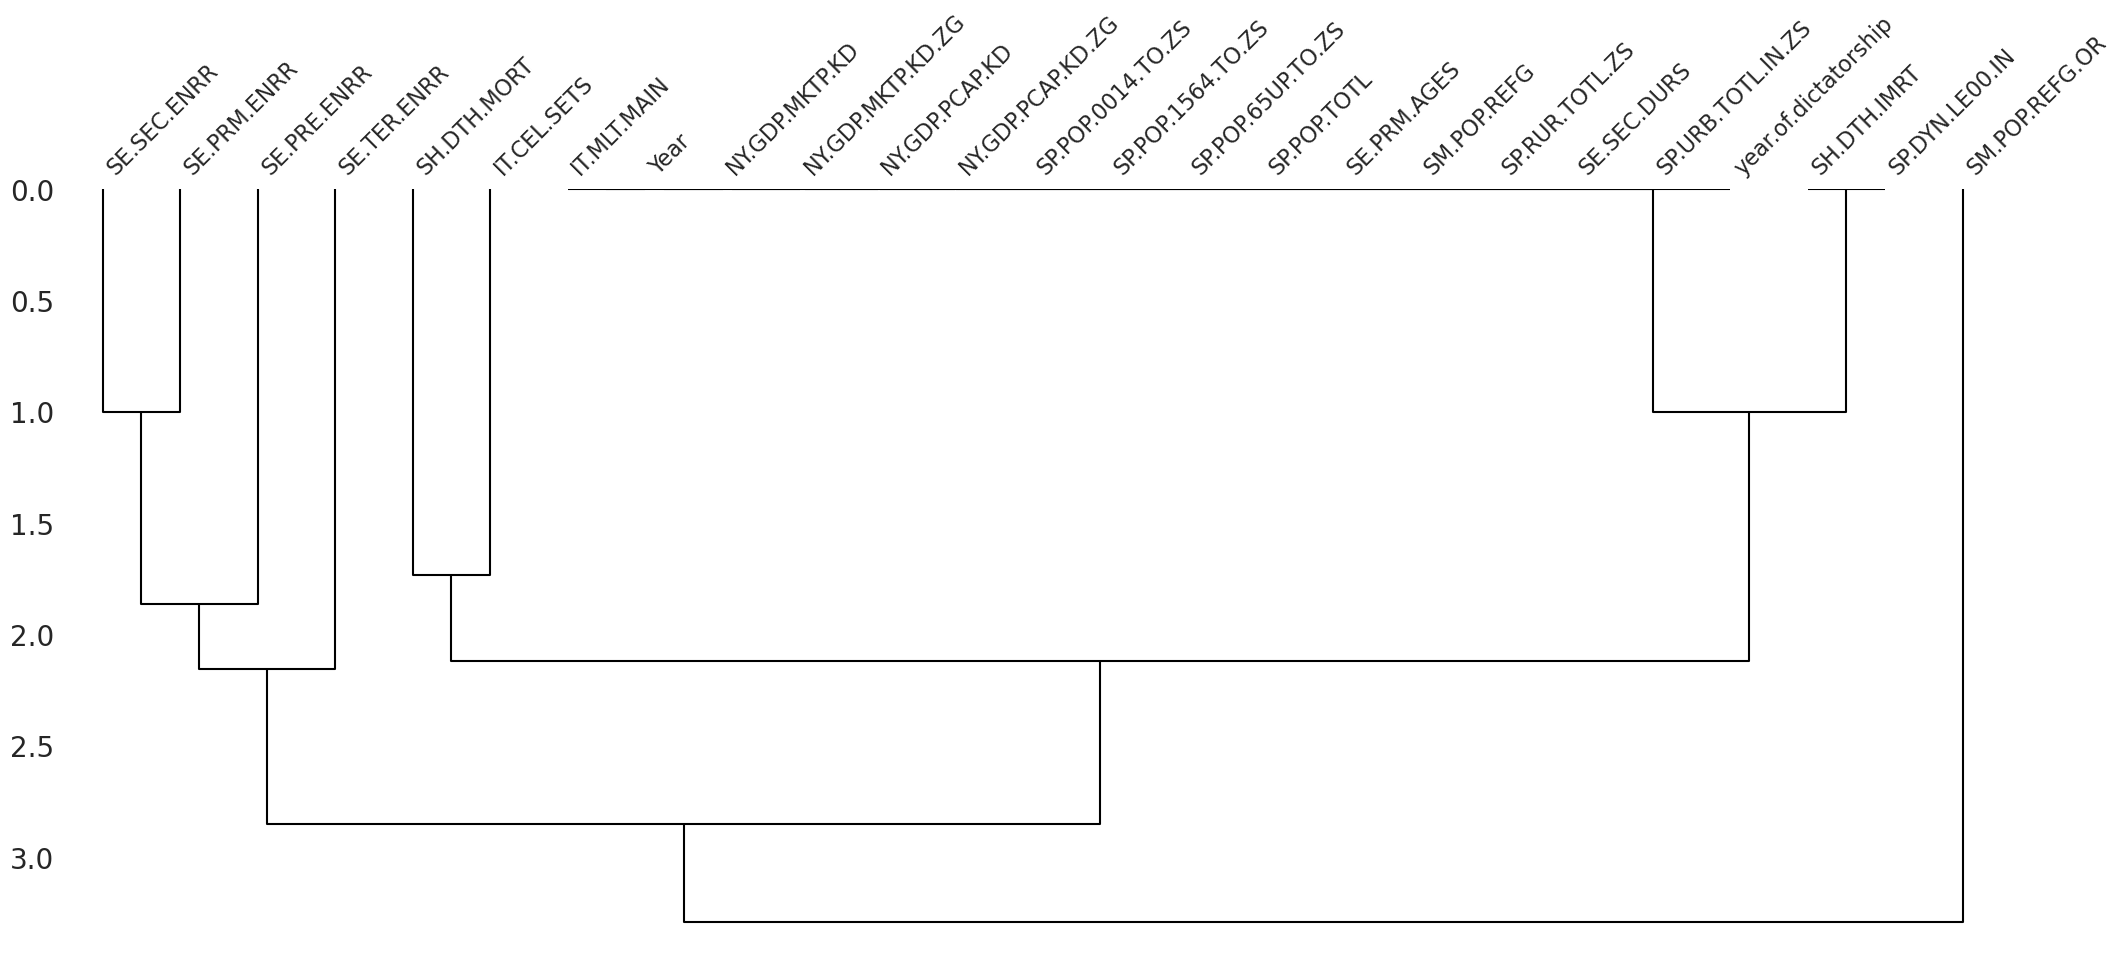

In [23]:
missingno.dendrogram(df=arg_di_df_best_cases)

#### Getting rows with missing values

In [24]:
rows_with_missing_values = arg_di_df_best_cases.set_index('Year').T.isna().sum().sort_values(ascending=False)
rows_with_missing_values = rows_with_missing_values[rows_with_missing_values > 0].index.to_list()
rows_with_missing_values

[2023,
 1989,
 2022,
 1995,
 1993,
 1992,
 1972,
 1973,
 1971,
 1990,
 1970,
 1974,
 1978,
 1997,
 1979,
 1975,
 1996,
 1976,
 1977,
 1983,
 2021,
 1988]

#### Upsetplot

This plot helps identify where data is complete across multiple indicators and where there might be gaps in the dataset.

**Claude AI explanation:**

An UpSet plot shows the relationships between multiple sets and their intersections. In this visualization:

The left bars show the total size of each set (e.g., IT.CEL.SETS, SH.DTH.MORT, etc.)
The bottom dots and connecting lines indicate which sets intersect
The top bars show the size of these intersections

For example, one intersection shows a bar with ~5 elements where SE.TER.ENRR (tertiary education enrollment) and SE.SEC.ENRR (secondary education enrollment) overlap, meaning there are about 5 years where data exists for both these metrics simultaneously.
The largest intersection (~32 elements) appears to be between several education enrollment metrics (SE.PRE.ENRR, SE.PRM.ENRR, SE.SEC.ENRR) and mortality indicators (SH.DTH.IMRT, SH.DTH.MORT), indicating years where all these measurements were recorded together.

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

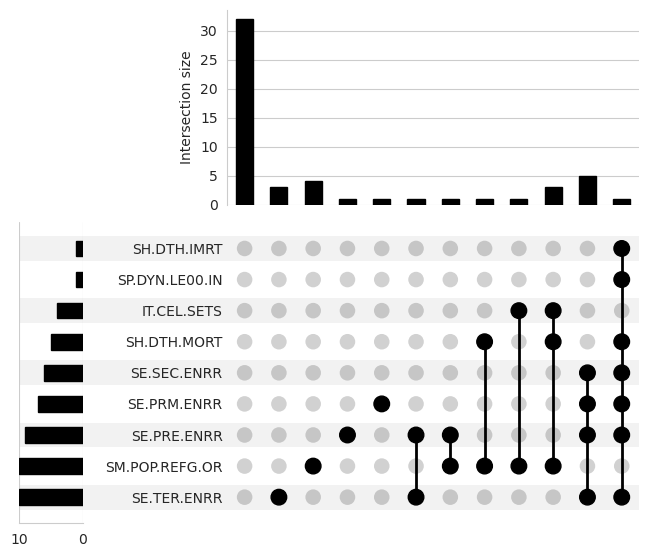

In [25]:
import warnings

warnings.simplefilter("ignore") # I will ignore the warnings only for this function
arg_di_df_best_cases[columns_with_missing_values].missing.missing_upsetplot()

##### Shadow matrix

In [26]:
shadow_matrix = arg_di_df_best_cases.missing.bind_shadow_matrix(only_missing = True, true_string="Missing", false_string="Not Missing")
shadow_matrix

,Year,IT.MLT.MAIN,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SP.DYN.LE00.IN,IT.CEL.SETS,SH.DTH.IMRT,SH.DTH.MORT,...,year.of.dictatorship,SP.DYN.LE00.IN_NA,IT.CEL.SETS_NA,SH.DTH.IMRT_NA,SH.DTH.MORT_NA,SM.POP.REFG.OR_NA,SE.PRE.ENRR_NA,SE.PRM.ENRR_NA,SE.SEC.ENRR_NA,SE.TER.ENRR_NA
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,True,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,True,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,True,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,True,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,False,Not Missing,Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
15,1975,1651000.0,2.570980e+11,-0.028412,9935.938635,-1.673528,67.081,0.0,33434.0,39640.0,...,False,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
16,1976,1678000.0,2.519091e+11,-2.018252,9581.841403,-3.563803,67.228,0.0,32686.0,38536.0,...,True,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
17,1977,1692000.0,2.693768e+11,6.934148,10083.815183,5.238803,67.861,0.0,31346.0,36750.0,...,True,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
18,1978,1728000.0,2.572384e+11,-4.506125,9476.063436,-6.027002,68.197,0.0,29499.0,34382.0,...,True,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing
19,1979,1797000.0,2.835352e+11,10.222763,10278.924624,8.472518,68.491,0.0,27357.0,31734.0,...,True,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing


Getting descriptive statistics of a variable grouped by  _NA variables

In [27]:
list = [shadow_matrix.groupby(item+"_NA")[arg_di_df_best_cases.columns[0]].describe() for item in columns_with_missing_values]

#### Plotting variables separated by _NA variables

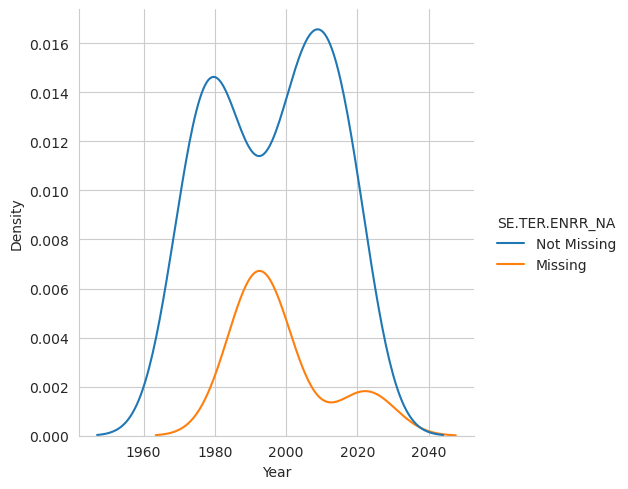

In [28]:
plot_missing_vs_variable(shadow_matrix, arg_di_df_best_cases.columns[0],  columns_with_missing_values[0]+"_NA", "displot")

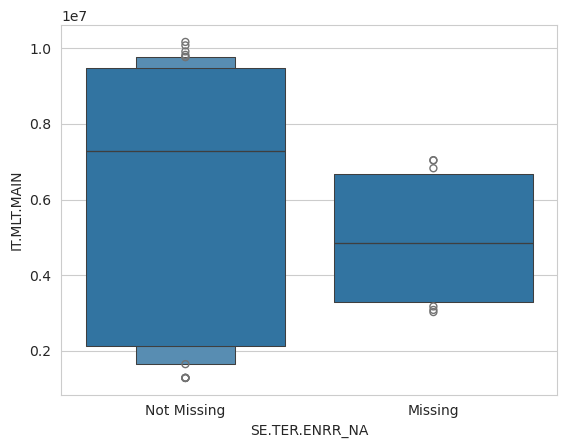

In [29]:
plot_missing_vs_variable(shadow_matrix, arg_di_df_best_cases.columns[1],  columns_with_missing_values[0]+"_NA", "boxenplot")

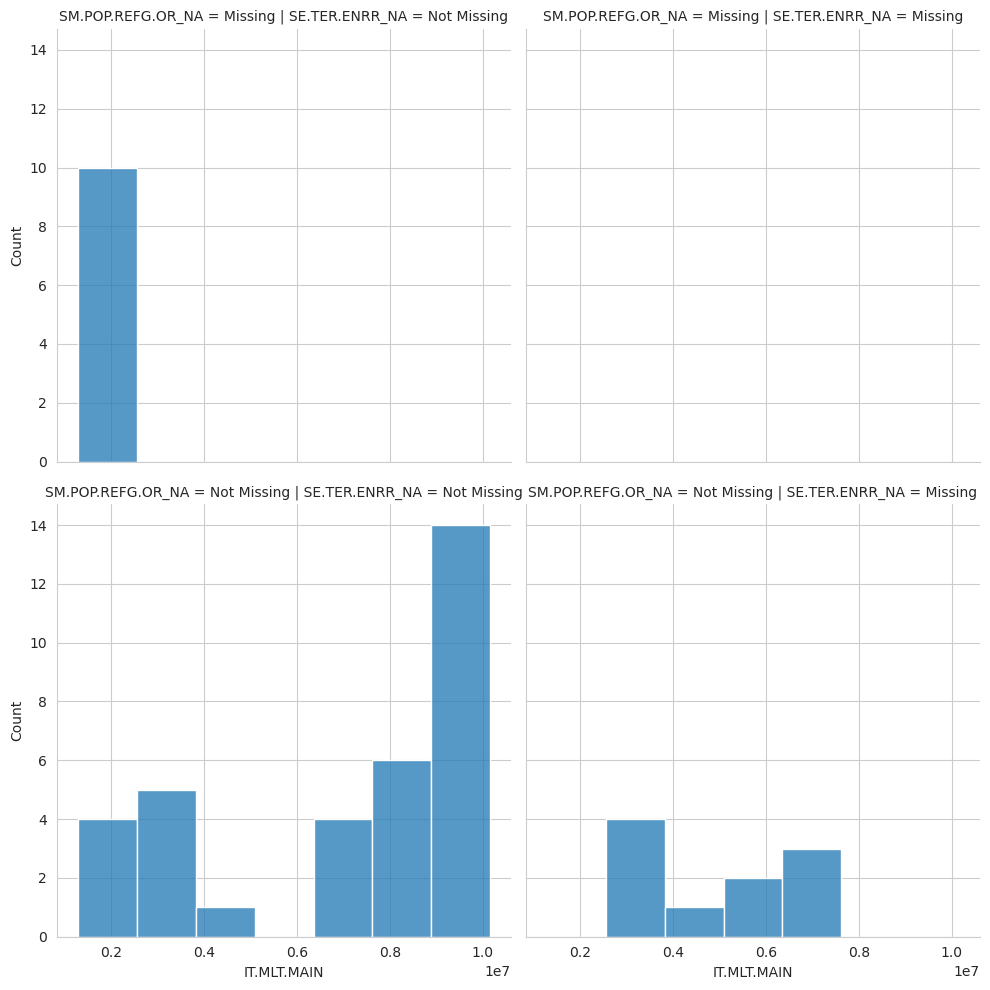

In [30]:
plot_2_missing_vs_variable(shadow_matrix,shadow_matrix.columns[1],columns_with_missing_values[0]+"_NA",columns_with_missing_values[1]+"_NA")

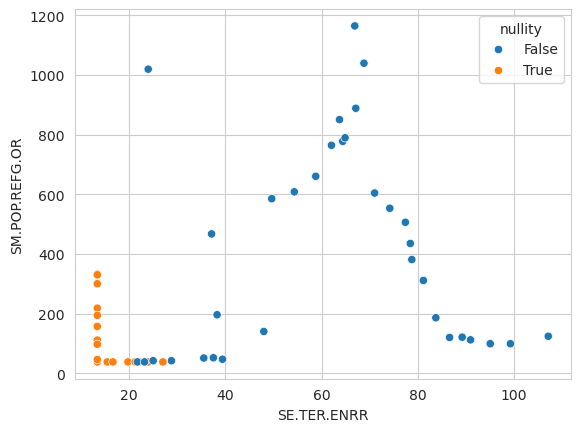

In [31]:
plot_2_missing(shadow_matrix, columns_with_missing_values[0]+"_NA", columns_with_missing_values[1]+"_NA")

#### Imputation of a single value

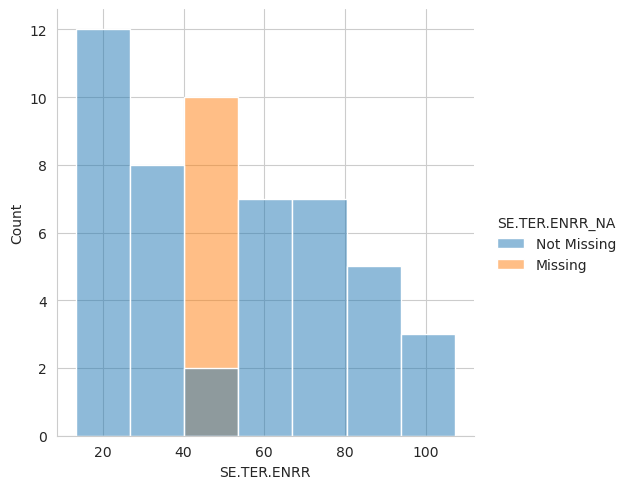

In [39]:
imputation_of_missing_variable(shadow_matrix, columns_with_missing_values[0])

#### Using dropna function

In [41]:
print(arg_di_df_best_cases.shape)

arg_di_df_best_cases.dropna(
    subset= columns_with_missing_values,
    how= "any"
).shape

(54, 25)


(32, 25)

In [42]:
arg_di_df_best_cases.to_csv('../data/processed/WDICSV_PROCESSED.csv', index_label='Year')